In [ ]:
# Questions answered/ Tasks performed while analysis of Netflix DataSet:
  
  # Netflix has more TV shows or Movies (with actual count)?
  # Renaming the Unnamed columns to make sense out of it.
  # What are those Movies/TV Shows that belong to more than one genre?
  # What were the Movies that were Added to Netflix in the year '2015' and After?
  # In which year NetFlix Added the most Movies/Tv Shows?
  # Rating column is not easily understandable,adding a new column to the DataSet that will show what these rating mean.
  # Ploting the Ratings that contains the Maximum no. of Movies/TV shows on Netflix.
  # What were the Movies & TV Shows that were added the same year to Netflix as when they were released?
  # Which TV Shows have more than or equal to '5 Seasons'?


In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import datetime as dt

In [2]:
import matplotlib as mpl 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#Importing Netflix DataSet from a local Excel File:
netflix_df= pd.read_excel(r'C:\Users\Ayush Jain\Documents\netflix_titles.xlsx',sheet_name='netflix_titles')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Unnamed: 11,Unnamed: 12,description
0,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,01-01-2008,2006,TV-MA,81 min,Dramas,Independent Movies,Thrillers,"While covering a story in New York City, a Sea..."
1,s1766,TV Show,Dinner for Five,NaN,NaN,United States,04-02-2008,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,NaN,NaN,"In each episode, four celebrities join host Jo..."
2,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,05-05-2009,2007,TV-MA,104 min,Dramas,International Movies,NaN,When he causes a car accident that leaves a yo...
3,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,18-11-2009,2009,TV-MA,29 min,Horror Movies,NaN,NaN,"After committing suicide, a washed-up rocker r..."
4,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,01-11-2010,1987,NR,84 min,Cult Movies,Horror Movies,NaN,"This collection cherry-picks trailers, forgott..."


C:\Users\Ayush Jain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


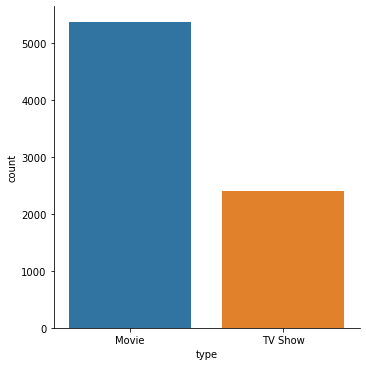

In [4]:
#Netflix has more TV shows or Movies?
sns.catplot('type',data=netflix_df,kind='count')

In [5]:
#Insights: Netflix has more than 5000 movies but just above 2000 Tv Shows.
#But What is the Actual Count:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [6]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Unnamed: 11,Unnamed: 12,description
0,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,01-01-2008,2006,TV-MA,81 min,Dramas,Independent Movies,Thrillers,"While covering a story in New York City, a Sea..."
1,s1766,TV Show,Dinner for Five,NaN,NaN,United States,04-02-2008,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,NaN,NaN,"In each episode, four celebrities join host Jo..."
2,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,05-05-2009,2007,TV-MA,104 min,Dramas,International Movies,NaN,When he causes a car accident that leaves a yo...
3,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,18-11-2009,2009,TV-MA,29 min,Horror Movies,NaN,NaN,"After committing suicide, a washed-up rocker r..."
4,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,01-11-2010,1987,NR,84 min,Cult Movies,Horror Movies,NaN,"This collection cherry-picks trailers, forgott..."


In [7]:
# Renaming the Unnamed columns to make sense out of it:
netflix_df.rename(columns={'listed_in':'genre_1','Unnamed: 11':'genre_2','Unnamed: 12':'genre_3'},
                            inplace=True)
netflix_df.head()    

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre_1,genre_2,genre_3,description
0,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,01-01-2008,2006,TV-MA,81 min,Dramas,Independent Movies,Thrillers,"While covering a story in New York City, a Sea..."
1,s1766,TV Show,Dinner for Five,NaN,NaN,United States,04-02-2008,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,NaN,NaN,"In each episode, four celebrities join host Jo..."
2,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,05-05-2009,2007,TV-MA,104 min,Dramas,International Movies,NaN,When he causes a car accident that leaves a yo...
3,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,18-11-2009,2009,TV-MA,29 min,Horror Movies,NaN,NaN,"After committing suicide, a washed-up rocker r..."
4,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,01-11-2010,1987,NR,84 min,Cult Movies,Horror Movies,NaN,"This collection cherry-picks trailers, forgott..."


In [8]:
#As we can notice that some Movies/TV Shows belong to more than one 'genre' , What are those Movies/TV Shows?

netflix_df['genre_2'].fillna(value=0,inplace=True)
netflix_multi_genre=netflix_df[netflix_df['genre_2'] != 0]
netflix_multi_genre

#This is the list of Movies that belong to more than one genre.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre_1,genre_2,genre_3,description
0,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,01-01-2008,2006,TV-MA,81 min,Dramas,Independent Movies,Thrillers,"While covering a story in New York City, a Sea..."
2,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,05-05-2009,2007,TV-MA,104 min,Dramas,International Movies,NaN,When he causes a car accident that leaves a yo...
4,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,01-11-2010,1987,NR,84 min,Cult Movies,Horror Movies,NaN,"This collection cherry-picks trailers, forgott..."
5,s2042,Movie,Even the Rain,IcÃ­ar BollaÃ­n,"Luis Tosar, Gael GarcÃ­a Bernal, Juan Carlos A...","Spain, Mexico, France",17-05-2011,2010,TV-MA,103 min,Dramas,International Movies,NaN,While making a film about the incursion of Chr...
10,s5042,Movie,Quiet Victory: The Charlie Wedemeyer Story,Roy Campanella II,"Pam Dawber, Michael Nouri, Bess Meyer, Peter B...",United States,01-10-2011,1988,TV-PG,93 min,Dramas,Sports Movies,NaN,When high school football coach Charlie Wedeme...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,Classic & Cult TV,TV Comedies,NaN,This hit sitcom follows the merry misadventure...
7781,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,Anime Series,Crime TV Shows,NaN,"On the surface, the Social Welfare Agency appe..."
7783,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Ã...",United States,NaN,2012,TV-14,3 Seasons,International TV Shows,Spanish-Language TV Shows,TV Comedies,"This irreverent sitcom featues Ludovico, Feder..."
7785,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason SaldaÃ±a, Gustavo Sorola, ...",United States,NaN,2015,NR,13 Seasons,TV Action & Adventure,TV Comedies,TV Sci-Fi & Fantasy,"This parody of first-person shooter games, mil..."


In [9]:
#What were the Movies that were Added to Netflix in the year '2015' and After:
netflix_movies = netflix_df[netflix_df['type'].str.contains('Movie')]

In [10]:
index_list=netflix_movies.index
Movie_id=[]
for d_add,s_id in zip(netflix_movies['date_added'],index_list):
    if d_add[6:10]== '2015' :
        Movie_id.append(s_id)
    elif d_add[6:10]== '2016' :
        Movie_id.append(s_id)
    elif d_add[6:10]== '2017' :
        Movie_id.append(s_id)
    elif d_add[6:10]== '2018' :
        Movie_id.append(s_id)
    elif d_add[6:10]== '2019' :
        Movie_id.append(s_id)
    elif d_add[6:10]== '2020' :
        Movie_id.append(s_id)
    elif d_add[6:10]== '2021' :
        Movie_id.append(s_id)
    
#List of Movies that were added to Netflix in the year 2015 or After:
netflix_movies.loc[Movie_id]



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre_1,genre_2,genre_3,description
53,s2947,Movie,Iliza Shlesinger: Freezing Hot,NaN,Iliza Shlesinger,NaN,23-01-2015,2015,TV-MA,72 min,Stand-Up Comedy,0,NaN,Smart and brazen comedian Iliza Shlesinger app...
55,s7435,Movie,Virunga: Gorillas in Peril,NaN,NaN,United States,13-02-2015,2015,TV-14,29 min,Documentaries,0,NaN,The team behind the searing documentary reveal...
56,s5826,Movie,Stop at Nothing: The Lance Armstrong Story,Alex Holmes,NaN,"Australia, United Kingdom, United States, New ...",15-02-2015,2014,NR,100 min,Documentaries,International Movies,Sports Movies,An athlete dupes the world with his tale of mi...
57,s5087,Movie,Ralphie May: Unruly,John Asher,Ralphie May,United States,27-02-2015,2015,TV-MA,83 min,Stand-Up Comedy,0,NaN,"Filmed in front of a raucous crowd, comedian R..."
58,s649,Movie,Aziz Ansari Live at Madison Square Garden,Aziz Ansari,Aziz Ansari,United States,06-03-2015,2015,TV-MA,58 min,Stand-Up Comedy,0,NaN,"Stand-up comedian and TV star Aziz Ansari (""Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,15-01-2021,2021,TV-14,32 min,Documentaries,0,NaN,"In this delightful short documentary, an Itali..."
6276,s7645,Movie,Wish You,Sung Do-jun,"Kang In-soo, Lee Sang, Soo-bin",NaN,15-01-2021,2021,TV-PG,102 min,Dramas,International Movies,LGBTQ Movies,"Singing and dreaming together, a talented sing..."
6277,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",16-01-2021,2016,PG-13,108 min,Dramas,Sci-Fi & Fantasy,NaN,"Overwhelmed by his motherâ€™s illness, a young..."
6278,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand",16-01-2021,2020,R,94 min,Horror Movies,0,NaN,"With no memory of the previous night, a vacati..."


C:\Users\Ayush Jain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


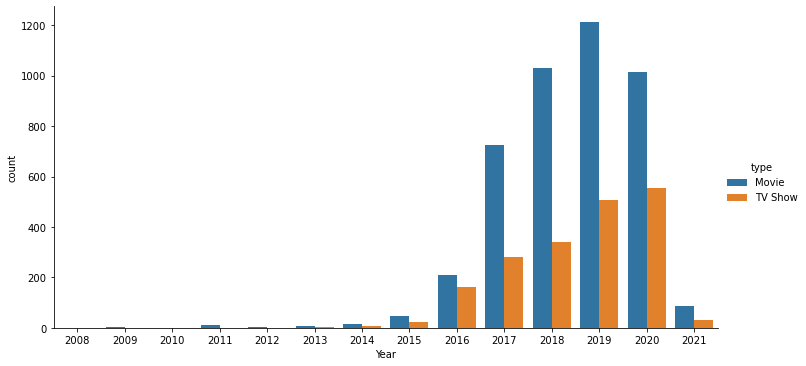

In [11]:
# In which year NetFlix Added the most Movies/Tv Shows :

netflix_yr= netflix_df
#Spliting string to get the Years of 'date_added' column:
nt_yr = netflix_yr['date_added'].str.rsplit('-',n=1,expand=True)
nt_yr.rename(columns={0:'Date',1:'Year'},inplace=True)

#Mergeing new DataFrame back to the old one:
netflix_yr=netflix_yr.merge(nt_yr,left_index=True,right_index=True)

#Ploting the results:
sns.catplot('Year',data=netflix_yr,
                   hue='type',
                   kind='count',
                   aspect=2)

In [12]:
#Insights: Looks like Netflix added the most Movies in Year 2019,
# and most number of TV shows in year 2020, till date.

In [13]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre_1,genre_2,genre_3,description
0,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,01-01-2008,2006,TV-MA,81 min,Dramas,Independent Movies,Thrillers,"While covering a story in New York City, a Sea..."
1,s1766,TV Show,Dinner for Five,NaN,NaN,United States,04-02-2008,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,0,NaN,"In each episode, four celebrities join host Jo..."
2,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,05-05-2009,2007,TV-MA,104 min,Dramas,International Movies,NaN,When he causes a car accident that leaves a yo...
3,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,18-11-2009,2009,TV-MA,29 min,Horror Movies,0,NaN,"After committing suicide, a washed-up rocker r..."
4,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,01-11-2010,1987,NR,84 min,Cult Movies,Horror Movies,NaN,"This collection cherry-picks trailers, forgott..."


In [14]:
netflix_df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [15]:
#Since these rating dont make any sense and are not easily understandable,
#adding a new column to the DataSet that will show what these rating mean:

# rating meaning acquired from web:
rating_meanings= pd.read_clipboard (sep='=',names=['key','meaning'])
rating_meanings

,key,meaning
0,TV-MA,15+
1,TV-14,14+
2,TV-PG,PG(<13)
3,TV-Y,for all ages
4,TV-Y7,for children above 7
5,TV-G,for all ages
6,NR,not rated
7,TV-Y7-FV,for children 7 and above (include fantsy viole...
8,UR,Unrated
9,NC-17,not for children below 17


In [17]:
#making key column_values as columns in order to convert the 'rating_meanings' df into a dictionary:

ratings_dict = rating_meanings.pivot_table(columns='key',values='meaning',aggfunc='first')

ratings_dict = ratings_dict.to_dict(orient='list')

#eliminating the '[]' from our dictionary for future convinience:
ratings_dict = {'NC-17': 'not for children below 17',
 'NR ': ' not rated',
 'TV-14': '14+',
 'TV-G ': 'for all ages',
 'TV-MA': '15+',
 'TV-PG': 'PG(<13)',
 'TV-Y ': 'for all ages',
 'TV-Y7': 'for children above 7',
 'TV-Y7-FV': 'for children 7 and above (include fantsy violence)',
 'UR ': 'Unrated'}

In [18]:
# using this Dictionary to map values into a New column in our original DataSet:

netflix_df['Category'] = netflix_df['rating'].map(ratings_dict)

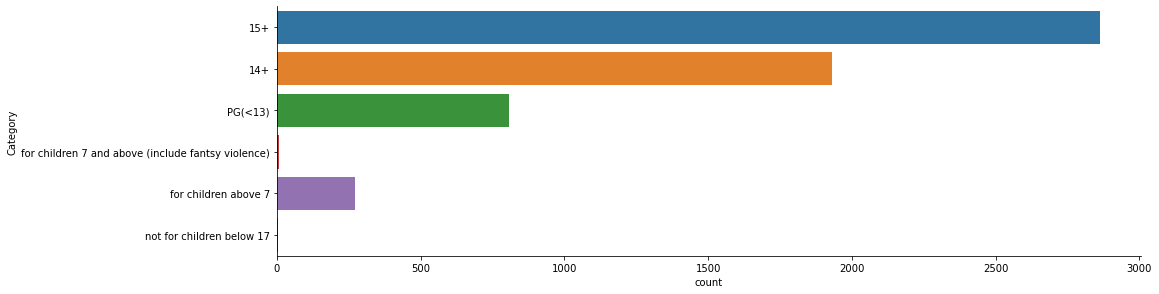

In [20]:
# Ploting the Ratings that contains the Maximum no. of Movies/TV shows on Netflix:
sns.catplot(y='Category',
            data=netflix_df,
            kind='count',
            height=4,
            aspect=4,)


In [21]:
# looks like maximum of Family Category Movies i.e 15+ and 14+. 
# What is the Actual categorical count:

netflix_df['Category'].value_counts()

15+                                                   2863
14+                                                   1931
PG(<13)                                                806
for children above 7                                   271
for children 7 and above (include fantsy violence)       6
not for children below 17                                3
Name: Category, dtype: int64

In [22]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genre_1       7787 non-null   object
 11  genre_2       7787 non-null   object
 12  genre_3       3298 non-null   object
 13  description   7787 non-null   object
 14  Category      5880 non-null   object
dtypes: int64(1), object(14)
memory usage: 912.7+ KB


In [24]:
# converting release_year column into dtype=Object, for future convenience:

netflix_df['release_year']=netflix_df['release_year'].astype(str)


In [25]:
# What were the Movies & TV Shows that were added the same year to Netflix as when they were released?

index_list=netflix_df.index
same_year=[]

for y_add,re_year,ind in zip(netflix_df['date_added'].astype(str),netflix_df['release_year'],index_list):
    if y_add[6:10]==re_year:
        same_year.append(ind)


In [26]:
# list of Movies & Tv shows , where release_year = date_added year:
netflix_df.loc[same_year] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre_1,genre_2,genre_3,description,Category
3,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,18-11-2009,2009,TV-MA,29 min,Horror Movies,0,NaN,"After committing suicide, a washed-up rocker r...",15+
18,s1230,Movie,Casa de mi Padre,Matt Piedmont,"Will Ferrell, Gael GarcÃ­a Bernal, Diego Luna,...","United States, Mexico",14-11-2012,2012,R,84 min,Comedies,0,NaN,Will Ferrell stars as a Spanish-speaking cowbo...,NaN
21,s1090,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,02-08-2013,2013,TV-MA,5 Seasons,Crime TV Shows,TV Dramas,TV Thrillers,A high school chemistry teacher dying of cance...,15+
22,s2949,Movie,Iliza Shlesinger: War Paint,Jay Chapman,Iliza Shlesinger,United States,01-09-2013,2013,NR,75 min,Stand-Up Comedy,0,NaN,"""Last Comic Standing"" winner Iliza Shlesinger ...",NaN
25,s5313,TV Show,Russell Peters vs. the World,NaN,Russell Peters,United States,14-10-2013,2013,NR,1 Season,Docuseries,Stand-Up Comedy & Talk Shows,NaN,"A four-part docu-series that's an exclusive, b...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6264,s1781,TV Show,Disenchantment,NaN,"Abbi Jacobson, Eric AndrÃ©, Nat Faxon, John Di...",United States,15-01-2021,2021,TV-14,3 Seasons,TV Action & Adventure,TV Comedies,TV Sci-Fi & Fantasy,"Princess duties call, but she'd rather be drin...",14+
6269,s4711,Movie,Outside the Wire,Mikael HÃ¥fstrÃ¶m,"Anthony Mackie, Damson Idris, Emily Beecham, M...",NaN,15-01-2021,2021,R,116 min,Action & Adventure,0,NaN,"In the near future, a drone pilot sent into a ...",NaN
6274,s7221,Movie,Tribhanga - Tedhi Medhi Crazy,Renuka Shahane,"Kajol, Tanvi Azmi, Mithila Palkar, Kunaal Roy ...",NaN,15-01-2021,2021,TV-MA,96 min,Dramas,International Movies,NaN,"When her estranged mother falls into a coma, a...",15+
6275,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,15-01-2021,2021,TV-14,32 min,Documentaries,0,NaN,"In this delightful short documentary, an Itali...",14+


In [32]:
# Which TV Shows have more than or equal to '5 Seasons' ?
 
# Separating all TV Shows from main dataset:
netflix_tvshows=netflix_df[netflix_df['type']=='TV Show']

# Spliting 'duration' column:
tv_split= netflix_tvshows['duration'].str.split(' ',n=1,expand=True)
tv_split.rename(columns={0:'Number',1:'Seasons'},inplace=True)

# Converting 'Number' column into dtype='int':
tv_split['Number']=tv_split['Number'].astype(int)

# Filtering out the Shows having more than 5 seasons:
index_list=netflix_tvshows.index
sorted_tv_index=[]

for n,ind in zip(tv_split['Number'],index_list):
    if n >= 5:
        sorted_tv_index.append(ind)

In [33]:
# list of TV Shows that have more than or equal to "5 Seasons":
netflix_tvshows.loc[sorted_tv_index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre_1,genre_2,genre_3,description,Category
21,s1090,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,02-08-2013,2013,TV-MA,5 Seasons,Crime TV Shows,TV Dramas,TV Thrillers,A high school chemistry teacher dying of cance...,15+
24,s2504,TV Show,Gossip Girl,NaN,"Blake Lively, Leighton Meester, Penn Badgley, ...",United States,08-10-2013,2012,TV-14,6 Seasons,TV Dramas,Teen TV Shows,NaN,A group of hyperprivileged Manhattan private-s...,14+
35,s7521,TV Show,Weeds,NaN,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,01-04-2014,2012,TV-MA,8 Seasons,TV Comedies,TV Dramas,NaN,A suburban mother starts selling marijuana to ...,15+
44,s2499,TV Show,Goosebumps,NaN,R.L. Stine,Canada,19-11-2014,1998,TV-G,5 Seasons,Kids' TV,TV Thrillers,NaN,R.L. Stine's tales take on a life of their own...,NaN
50,s4812,TV Show,Pee-wee's Playhouse,NaN,Paul Reubens,United States,18-12-2014,1990,TV-PG,5 Seasons,Classic & Cult TV,Kids' TV,TV Comedies,Pee-wee Herman brings his stage show to the ma...,PG(<13)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,s7535,TV Show,Wentworth,NaN,"Danielle Cormack, Nicole da Silva, Kate Atkins...",Australia,"September 30, 2020",2020,TV-MA,8 Seasons,Crime TV Shows,TV Dramas,NaN,Bea Smith is locked up while awaiting trial fo...,15+
7778,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,0,NaN,This CNN original series has chef Anthony Bour...,PG(<13)
7779,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,Classic & Cult TV,TV Comedies,NaN,Frasier Crane is a snooty but lovable Seattle ...,PG(<13)
7780,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,Classic & Cult TV,TV Comedies,NaN,This hit sitcom follows the merry misadventure...,14+
